In [243]:
from scipy import stats
from functools import reduce

import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

In [244]:
movie_budgets = pd.read_csv("zippedData/movie_budgets_clean.csv")
movie_budgets

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747
...,...,...,...,...,...,...,...,...,...,...,...
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,-7000,-7000
5778,5778,79,"Apr 2, 1999",Following,6000,48482,240495,192013,42482,186013,234495
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,-3662,-5000,-3662
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,-1400,-1400,-1400


In [245]:
movie_budgets.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit
count,5782.00000,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,2890.50000,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,4.961413e+07,1.028557e+07,1.802638e+07,5.989970e+07
std,1669.26396,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.131192e+08,4.992137e+07,8.673950e+07,1.460889e+08
min,0.00000,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-3.072376e+08,-2.430000e+08,-2.002376e+08
25%,1445.25000,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,0.000000e+00,-9.132757e+06,-1.261772e+07,-2.189071e+06
50%,2890.50000,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,5.701766e+06,-3.487755e+05,-2.000000e+06,8.550286e+06
75%,4335.75000,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,4.682110e+07,1.778144e+07,1.198268e+07,6.096850e+07
max,5781.00000,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,6.306622e+08,1.590838e+09,2.351345e+09


In [246]:
WHAT DOES IT MEAN HOW THE Profit OF MOVIES REALATE OVER TIME!

SyntaxError: invalid syntax (<ipython-input-246-16810d922206>, line 1)

Text(0.5, 1.0, 'Domestic Profit over Time')

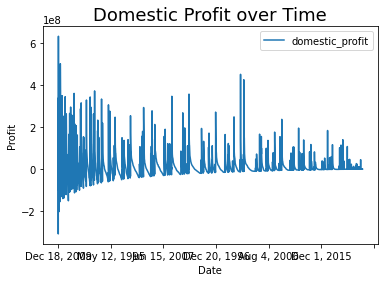

In [247]:
movie_budgets.plot(x='release_date',y='domestic_profit')
plt.xlabel("Date",size=10)
plt.ylabel("Profit",size=10)
plt.title("Domestic Profit over Time", size=18)

Text(0.5, 1.0, 'Foreign Profit over Time')

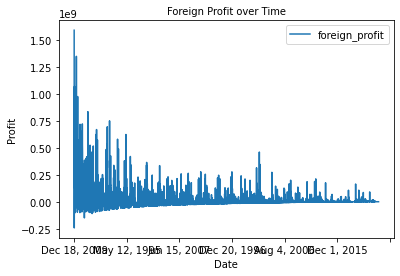

In [248]:
movie_budgets.plot(x='release_date',y='foreign_profit')
plt.xlabel("Date",size=10)
plt.ylabel("Profit",size=10)
plt.title("Foreign Profit over Time", size=10)

Text(0.5, 1.0, 'Overall profit over Time')

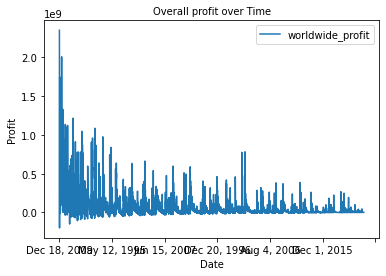

In [249]:
movie_budgets.plot(x='release_date',y='worldwide_profit')
plt.xlabel("Date",size=10)
plt.ylabel("Profit",size=10)
plt.title("Overall profit over Time", size=10)

In [250]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         5782 non-null   int64 
 1   id                 5782 non-null   int64 
 2   release_date       5782 non-null   object
 3   movie              5782 non-null   object
 4   production_budget  5782 non-null   int64 
 5   domestic_gross     5782 non-null   int64 
 6   worldwide_gross    5782 non-null   int64 
 7   foreign_gross      5782 non-null   int64 
 8   domestic_profit    5782 non-null   int64 
 9   foreign_profit     5782 non-null   int64 
 10  worldwide_profit   5782 non-null   int64 
dtypes: int64(9), object(2)
memory usage: 497.0+ KB


In [251]:
small_films = []
med_films = []
lg_films = []
def movie_div(comp):
    i = 0
    for movi in movie_budgets['production_budget']:
        if movi <= small_budget:
            small_films.append(movie_budgets.iloc[i])
            i += 1
        elif movi <= medium_budget:
            med_films.append(movie_budgets.iloc[i])
            i += 1
        else:
            lg_films.append(movie_budgets.iloc[i])
            i += 1
            
movie_div(small_budget)
movie_div(medium_budget)
movie_div(large_budget)


In [252]:

small_budget_movies = pd.DataFrame(small_films)
med_budget_movies = pd.DataFrame(med_films)
lg_budget_movies = pd.DataFrame(lg_films)


In [253]:
movie_budgets.describe()

,Unnamed: 0,id,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit
count,5782.00000,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03
mean,2890.50000,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,4.961413e+07,1.028557e+07,1.802638e+07,5.989970e+07
std,1669.26396,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,1.131192e+08,4.992137e+07,8.673950e+07,1.460889e+08
min,0.00000,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,0.000000e+00,-3.072376e+08,-2.430000e+08,-2.002376e+08
25%,1445.25000,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,0.000000e+00,-9.132757e+06,-1.261772e+07,-2.189071e+06
50%,2890.50000,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,5.701766e+06,-3.487755e+05,-2.000000e+06,8.550286e+06
75%,4335.75000,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,4.682110e+07,1.778144e+07,1.198268e+07,6.096850e+07
max,5781.00000,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,2.015838e+09,6.306622e+08,1.590838e+09,2.351345e+09


In [254]:
1

# HYPOTHESIS TESTING ON WHERE YOU LAUNCH YOUR MOVIE MATTERS! 
#IS THERE A STATISTICAL DIFFERENCE BETWEEN LAUNCHING THE MOVIE DOMESTICALLY OR WORLD-WIDE

1

In [255]:
# NULL AND ALTERNATIVE HYPOTHESIS
#H0: # There is not a statistical difference between launching your movie domestically 
#HA: # There is a statisitcal differnece between laucnhing your movie domestically than world wide
    

In [256]:
# Sigificantce Level
alpha = .05


In [257]:
# All of the statistical Values that we need 

#means 
population_profit_mean = movie_budgets['worldwide_profit'].mean()
domestic_profit_mean = movie_budgets['domestic_profit'].mean()

#sample size
sample_size_domestic = 5782 # the count of all of the rows in the budgets table since there is not missing data
#Standard Deviation

Standard_deviation = np.std(movie_budgets['worldwide_profit'])

#Z score

z_dom = (domestic_profit_mean - population_profit_mean)/(Standard_deviation/(np.sqrt(sample_size_domestic)))

z_dom

-25.826458420960858

In [258]:
stats.norm.cdf(z_dom)

2.2371432265758026e-147

In [259]:
# Since the p-value is less than .05 we can reject the null there is a
#statistical difference to launching a movie domestically that worldwide

In [260]:

2

# HYPOTHESIS TESTING ON WHERE YOU LAUNCH YOUR MOVIE MATTERS! 
#IS THERE A STATISTICAL DIFFERENCE BETWEEN LAUNCHING THE MOVIE Just Foreignly  OR WORLD-WIDE

2

In [261]:
# NULL AND ALTERNATIVE HYPOTHESIS
#H0: # There is not a statistical difference in profit between launching your movie forgeinly than worldwide 
#HA: # There is a statisitcal differnece in profit between laucnhing your movie foreignly than world wide

In [262]:
alpha = .05


In [263]:
# All of the statistical Values that we need 

#means 
population_profit_mean = movie_budgets['worldwide_profit'].mean()
foreign_profit_mean = movie_budgets['foreign_profit'].mean()

#sample size
sample_size_foreign = len(movie_budgets['foreign_profit']) # the count of all of the rows in the budgets table since there is not missing data
#Standard Deviation

Standard_deviation = np.std(movie_budgets['worldwide_profit'])

#Z score

z_for = (foreign_profit_mean - population_profit_mean)/(Standard_deviation/(np.sqrt(sample_size_foreign)))

z_for

-21.797009183278096

In [264]:
stats.norm.cdf(z_for)

1.2384058909078657e-105

movie_budgets

In [315]:
movie_budgets['domestic_margin'] = ((movie_budgets['domestic_profit'] / movie_budgets['worldwide_profit'].sum())*100).round(3)

In [316]:


movie_budgets['foreign_margin'] = ((movie_budgets['foreign_profit'] / movie_budgets['worldwide_profit'].sum())*100).round(3)
movie_budgets['WorldWide_margin'] = ((movie_budgets['worldwide_profit'] / movie_budgets['worldwide_profit'].sum())*100).round(3)
movie_budgets

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_margin,foreign_margin,WorldWide_margin
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279,0.097,0.459,0.679
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875,-0.049,0.114,0.183
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650,-0.089,-0.070,-0.058
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963,0.037,0.177,0.310
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747,0.088,0.110,0.289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,-7000,-7000,-0.000,-0.000,-0.000
5778,5778,79,"Apr 2, 1999",Following,6000,48482,240495,192013,42482,186013,234495,0.000,0.000,0.000
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,-3662,-5000,-3662,-0.000,-0.000,-0.000
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,-1400,-1400,-1400,-0.000,-0.000,-0.000


In [317]:
# HYPOTHESIS TESTING ON WHERE YOU LAUNCH YOUR MOVIE MATTERS! 
#IS THERE A STATISTICAL DIFFERENCE IN PROFIT BETWEEN LAUNCHING THE MOVIE Foreignly OR WORLD-WIDE 
#we must reject the null since the p-value is lower than alpha 

In [318]:
#Hypothesis Test 3


# NULL AND ALTERNATIVE HYPOTHESIS


#H0: # There is not a statistical difference in profit between launching your movie forgeinly than Domestically  
#HA: # The One population of profits is greater than the other

In [319]:
alpha = .05


In [320]:
# All of the statistical Values that we need 

#means 
domestic_profit_mean = movie_budgets['domestic_profit'].mean()
foreign_profit_mean = movie_budgets['foreign_profit'].mean()

#sample size
sample_size_domestic = len(movie_budgets['domestic_profit']) # the count of all of the rows in the budgets table since there is not missing data
sample_size_foreign = len(movie_budgets['foreign_profit'])
#Standard Deviation

Standard_deviation_domestic = np.std(movie_budgets['domestic_profit'])

Standard_deviation_foregin = np.std(movie_budgets['foreign_profit'])

#Z score

z_two_sample_domestic_v_foreign = (domestic_profit_mean - foreign_profit_mean - 0)/ np.sqrt((np.square(Standard_deviation_domestic)/sample_size_domestic) + (np.square(Standard_deviation_foregin)/sample_size_foreign))  


z_two_sample_domestic_v_foreign

-5.881907670155057

In [321]:
stats.norm.cdf(z_two_sample)

2.027822875981339e-09

In [322]:
# Because our p value is less than .05  we reject the null 
#the foreign population is greater than the domestic population of overall profits.

In [323]:
movie_budgets

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_margin,foreign_margin,WorldWide_margin
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279,0.097,0.459,0.679
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875,-0.049,0.114,0.183
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650,-0.089,-0.070,-0.058
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963,0.037,0.177,0.310
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747,0.088,0.110,0.289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,-7000,-7000,-0.000,-0.000,-0.000
5778,5778,79,"Apr 2, 1999",Following,6000,48482,240495,192013,42482,186013,234495,0.000,0.000,0.000
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,-3662,-5000,-3662,-0.000,-0.000,-0.000
5780,5780,81,"Sep 29, 2015",A Plague So Pleasant,1400,0,0,0,-1400,-1400,-1400,-0.000,-0.000,-0.000


sns.relplot(x='movie', y='domestic_margin', data=penguins_data)


In [324]:
import plotly.express as px


fig = px.scatter(movie_budgets, x="domestic_margin", y= "id" , trendline="ols")
fig.show()

In [325]:
domestic_movies = []
foreign_movies = []
def movie_regions(comps):
    i = 0
    for movies in movie_budgets['domestic_gross']:
        if movies > 0:
            domestic_movies.append(movie_budgets.iloc[i])
            i += 1
        else:
            foreign_movies.append(movie_budgets.iloc[i])
            i += 1
movie_regions(domestic_movies)
movie_regions(foreign_movies)

In [326]:
domestic_movies

[Unnamed: 0                      0
 id                              1
 release_date         Dec 18, 2009
 movie                      Avatar
 production_budget       425000000
 domestic_gross          760507625
 worldwide_gross        2776345279
 foreign_gross          2015837654
 domestic_profit         335507625
 foreign_profit         1590837654
 worldwide_profit       2351345279
 domestic_margin             0.097
 foreign_margin              0.459
 WorldWide_margin            0.679
 Name: 0, dtype: object,
 Unnamed: 0                                                     1
 id                                                             2
 release_date                                        May 20, 2011
 movie                Pirates of the Caribbean: On Stranger Tides
 production_budget                                      410600000
 domestic_gross                                         241063875
 worldwide_gross                                       1045663875
 foreign_gross         

In [327]:
Domestic = pd.DataFrame(domestic_movies)
Foreign = pd.DataFrame(foreign_movies)


In [328]:
Domestic

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_margin,foreign_margin,WorldWide_margin
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279,0.097,0.459,0.679
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875,-0.049,0.114,0.183
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650,-0.089,-0.070,-0.058
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963,0.037,0.177,0.310
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747,0.088,0.110,0.289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5775,5775,76,"May 26, 2006",Cavite,7000,70071,71644,1573,63071,-5427,64644,0.000,-0.000,0.000
5776,5776,77,"Dec 31, 2004",The Mongol King,7000,900,900,0,-6100,-7000,-6100,-0.000,-0.000,-0.000
5778,5778,79,"Apr 2, 1999",Following,6000,48482,240495,192013,42482,186013,234495,0.000,0.000,0.000
5779,5779,80,"Jul 13, 2005",Return to the Land of Wonders,5000,1338,1338,0,-3662,-5000,-3662,-0.000,-0.000,-0.000


In [329]:
Domestic['Domestic'] = 1

D


In [330]:
Foreign

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_margin,foreign_margin,WorldWide_margin
194,194,95,"Dec 31, 2020",Moonfall,150000000,0,0,0,-150000000,-150000000,-150000000,-0.043,-0.043,-0.043
479,479,80,"Dec 13, 2017",Bright,90000000,0,0,0,-90000000,-90000000,-90000000,-0.026,-0.026,-0.026
480,480,81,"Dec 31, 2019",Army of the Dead,90000000,0,0,0,-90000000,-90000000,-90000000,-0.026,-0.026,-0.026
535,535,36,"Feb 21, 2020",Call of the Wild,82000000,0,0,0,-82000000,-82000000,-82000000,-0.024,-0.024,-0.024
617,617,18,"Dec 31, 2012",AstÃ©rix et ObÃ©lix: Au service de Sa MajestÃ©,77600000,0,60680125,60680125,-77600000,-16919875,-16919875,-0.022,-0.005,-0.005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0,-15000,-15000,-15000,-0.000,-0.000,-0.000
5764,5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,0,-12000,-12000,-12000,-0.000,-0.000,-0.000
5771,5771,72,"May 19, 2015",Family Motocross,10000,0,0,0,-10000,-10000,-10000,-0.000,-0.000,-0.000
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,-7000,-7000,-0.000,-0.000,-0.000


In [335]:
Movie_regions = [Domestic,Foreign]
Regions =  pd.concat(Movie_regions,axis = 0, join = 'outer')

In [336]:
Regions 

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_margin,foreign_margin,WorldWide_margin,Region
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279,0.097,0.459,0.679,Domestic
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875,-0.049,0.114,0.183,Domestic
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650,-0.089,-0.070,-0.058,Domestic
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963,0.037,0.177,0.310,Domestic
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747,0.088,0.110,0.289,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0,-15000,-15000,-15000,-0.000,-0.000,-0.000,Foreign
5764,5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,0,-12000,-12000,-12000,-0.000,-0.000,-0.000,Foreign
5771,5771,72,"May 19, 2015",Family Motocross,10000,0,0,0,-10000,-10000,-10000,-0.000,-0.000,-0.000,Foreign
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,-7000,-7000,-0.000,-0.000,-0.000,Foreign


[Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Margin'),
 Text(0.5, 1.0, 'Release Date Vs Profitablility')]

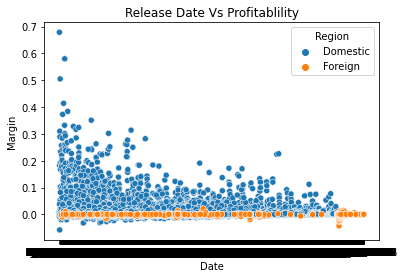

In [343]:
dvb = sns.scatterplot(x = "release_date", y = "WorldWide_margin", data = Regions, hue = "Region")
dvb.set(xlabel = "Date",
      ylabel = "Margin",
      title = "Release Date Vs Profitablility")

<AxesSubplot:xlabel='production_budget', ylabel='WorldWide_margin'>

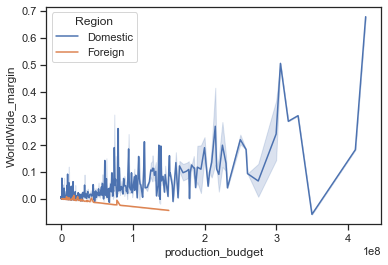

In [352]:
sns.lineplot(data=Regions, x="production_budget", y="WorldWide_margin", hue="Region")

<AxesSubplot:xlabel='foreign_margin', ylabel='WorldWide_margin'>

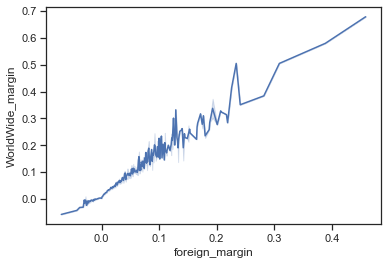

In [354]:
sns.lineplot(data=Regions, x="foreign_margin", y="WorldWide_margin")

<AxesSubplot:xlabel='domestic_margin', ylabel='WorldWide_margin'>

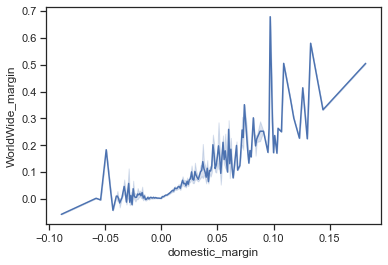

In [355]:
sns.lineplot(data=Regions, x="domestic_margin", y="WorldWide_margin")

<AxesSubplot:xlabel='production_budget', ylabel='domestic_margin'>

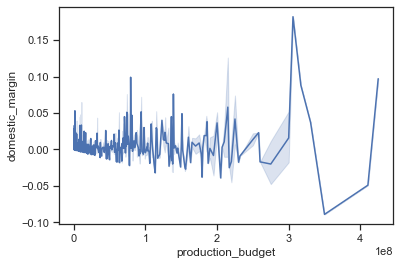

In [356]:
sns.lineplot(data=Regions, x="production_budget", y="domestic_margin")

<AxesSubplot:xlabel='production_budget', ylabel='foreign_margin'>

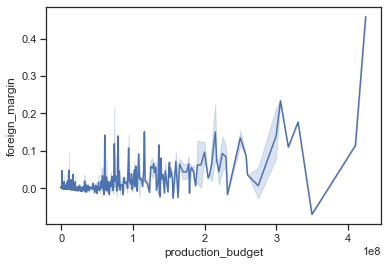

In [357]:
sns.lineplot(data=Regions, x="production_budget", y="foreign_margin")

<AxesSubplot:xlabel='release_date', ylabel='domestic_margin'>

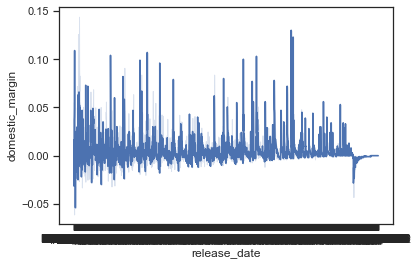

In [358]:
sns.lineplot(data=Regions, x="release_date", y="domestic_margin")

<AxesSubplot:xlabel='release_date', ylabel='foreign_margin'>

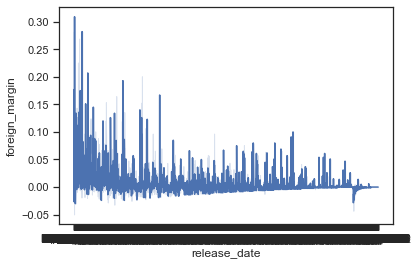

In [359]:
sns.lineplot(data=Regions, x="release_date", y="foreign_margin")

In [360]:
movie_regions = Regions

In [361]:
movie_regions

,Unnamed: 0,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,foreign_gross,domestic_profit,foreign_profit,worldwide_profit,domestic_margin,foreign_margin,WorldWide_margin,Region
0,0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279,2015837654,335507625,1590837654,2351345279,0.097,0.459,0.679,Domestic
1,1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,804600000,-169536125,394000000,635063875,-0.049,0.114,0.183,Domestic
2,2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350,107000000,-307237650,-243000000,-200237650,-0.089,-0.070,-0.058,Domestic
3,3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963,944008095,128405868,613408095,1072413963,0.037,0.177,0.310,Domestic
4,4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,696540365,303181382,379540365,999721747,0.088,0.110,0.289,Domestic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5761,5761,62,"Dec 31, 2014",Stories of Our Lives,15000,0,0,0,-15000,-15000,-15000,-0.000,-0.000,-0.000,Foreign
5764,5764,65,"Dec 31, 2007",Tin Can Man,12000,0,0,0,-12000,-12000,-12000,-0.000,-0.000,-0.000,Foreign
5771,5771,72,"May 19, 2015",Family Motocross,10000,0,0,0,-10000,-10000,-10000,-0.000,-0.000,-0.000,Foreign
5777,5777,78,"Dec 31, 2018",Red 11,7000,0,0,0,-7000,-7000,-7000,-0.000,-0.000,-0.000,Foreign


In [362]:
# saving the dataframe
movie_regions.to_csv('zippedData/movie_regions.csv')


In [2]:

fig = px.scatter(movie_regions, x="production_budget", y= "foreign_profit" , trendline="ols")
fig.show()

NameError: name 'px' is not defined